In [ ]:
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [ ]:
dataframe=pd.read_csv('/content/DNA_Dataset_Normalized.csv')

In [ ]:

dataframe

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_13,...,gene_41,gene_42,gene_43,gene_44,gene_45,gene_46,gene_47,gene_48,gene_49,Class
0,2.325242,3.247092,8.174007,10.065053,7.487446,0.000000,0.000000,0.000000,2.759582,0.000000,...,0.000000,0.000000,0.566572,2.759582,7.149066,9.382985,11.393793,11.642183,0.000000,BRCA
1,3.446190,3.620962,7.171917,9.796559,8.175245,1.972509,0.000000,1.972509,2.218967,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.292138,10.073097,8.763408,11.354894,0.791689,BRCA
2,2.554196,1.296134,8.770277,10.462901,8.013993,0.000000,0.000000,0.736562,3.543446,0.000000,...,0.000000,0.414785,0.000000,6.290605,6.865300,9.681449,8.968667,11.782720,0.414785,BRCA
3,3.667699,3.083179,7.997292,9.516886,7.925424,0.732486,0.000000,0.000000,3.762157,0.000000,...,0.000000,0.000000,0.000000,0.000000,7.258726,10.100321,9.391772,11.355979,0.000000,BRCA
4,3.821935,3.717605,7.593100,10.205964,7.613185,0.000000,0.000000,0.000000,1.982364,0.000000,...,0.000000,0.000000,0.000000,2.261441,8.054105,10.471025,8.439449,11.730143,0.000000,BRCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.000000,1.886433,7.052959,9.965753,7.085977,0.000000,1.008272,1.231801,3.474371,0.419215,...,0.419215,0.000000,0.743558,0.419215,5.993450,10.303747,10.196737,10.920301,0.000000,PRAD
386,0.000000,4.154988,5.868203,10.381900,7.353509,0.000000,0.000000,1.167037,2.243852,0.000000,...,0.000000,0.698485,0.000000,1.803640,6.670826,10.622015,9.567768,10.973898,0.000000,PRAD
387,1.256286,2.155684,6.898692,9.994891,7.849955,0.489235,0.489235,0.853916,2.975098,0.000000,...,0.000000,0.000000,0.000000,1.774966,11.031391,10.641411,9.913281,11.420702,0.000000,PRAD
388,2.423255,3.190883,7.171527,9.156098,7.191207,1.287945,0.566182,1.287945,1.957395,0.000000,...,0.000000,0.000000,0.000000,1.766807,5.419937,9.940838,10.266002,10.171765,0.000000,PRAD


In [ ]:

dataframe['Class'].value_counts()

BRCA    78
KIRC    78
COAD    78
LUAD    78
PRAD    78
Name: Class, dtype: int64

<Axes: >

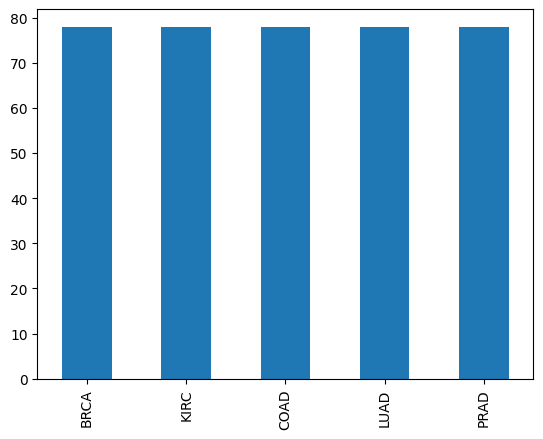

In [ ]:
dataframe['Class'].value_counts().plot.bar()

In [ ]:
X=dataframe.iloc[:,2:-1]
y=dataframe.iloc[:,-1]


In [ ]:
X.shape

(390, 42)

In [ ]:
y.shape

(390,)

In [ ]:
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [ ]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [ ]:
classes

array([0, 1, 2, 3, 4])

In [ ]:
#split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state=42)

In [ ]:
dataframe.iloc[:,0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_6
count,390.000000,390.000000,390.000000,390.000000,390.000000
mean,3.025948,3.192807,6.834967,9.785579,7.330231
std,1.246116,1.049015,0.737371,0.497189,1.032067
min,0.000000,0.000000,5.009284,8.435999,4.534466
25%,2.341329,2.490260,6.347902,9.444469,6.615592
50%,3.165172,3.216300,6.735995,9.761957,7.433040
75%,3.857806,3.836318,7.161614,10.125391,7.995617
max,6.237034,5.848044,10.129528,11.269372,10.219132


In [ ]:
# scale data between 0 and 1

min_max_scaler=MinMaxScaler()
X_train_norm=min_max_scaler.fit_transform(X_train)
X_test_norm=min_max_scaler.fit_transform(X_test)

In [ ]:
MI=mutual_info_classif(X_train_norm,y_train)

In [ ]:
#select top n features. lets say 300.
#you can modify the value and see how the performance of the model changes

n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features]

In [ ]:
X_train_selected=X_train_norm[:,selected_scores_indices]
X_test_selected=X_test_norm[:,selected_scores_indices]

In [ ]:
X_train_selected.shape

(312, 2)

In [ ]:
X_test_selected.shape

(78, 2)

In [ ]:
print(dataframe.iloc[:,:5].corr())

          gene_1    gene_2    gene_3    gene_4    gene_6
gene_1  1.000000  0.510577  0.205975 -0.130858  0.233945
gene_2  0.510577  1.000000  0.041847 -0.073796  0.366849
gene_3  0.205975  0.041847  1.000000  0.185866 -0.011198
gene_4 -0.130858 -0.073796  0.185866  1.000000 -0.025694
gene_6  0.233945  0.366849 -0.011198 -0.025694  1.000000


In [ ]:
#model training
#Random Forest Classifier
#because we are dealing with multiclass data, the one versus rest strategy is used.
#learn to predict each class against the other.

RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(X_train_selected,y_train)
y_pred =RF.predict(X_test_selected)
pred_prob = RF.predict_proba(X_test_selected)


In [ ]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)



report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.3589
precision:0.4023
recall:0.4103
f1score:0.4000


classification report


              precision    recall  f1-score   support

        BRCA       0.70      0.86      0.78        22
        COAD       0.33      0.38      0.35         8
        KIRC       0.54      0.37      0.44        19
        LUAD       0.00      0.00      0.00        13
        PRAD       0.19      0.19      0.19        16

    accuracy                           0.41        78
   macro avg       0.35      0.36      0.35        78
weighted avg       0.40      0.41      0.40        78



In [ ]:
#generate confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)

In [ ]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,21,0,0,0,1
COAD,0,8,0,0,0
KIRC,0,0,17,0,2
LUAD,0,0,0,8,5
PRAD,0,0,0,0,16


Text(50.722222222222214, 0.5, 'True Labels')

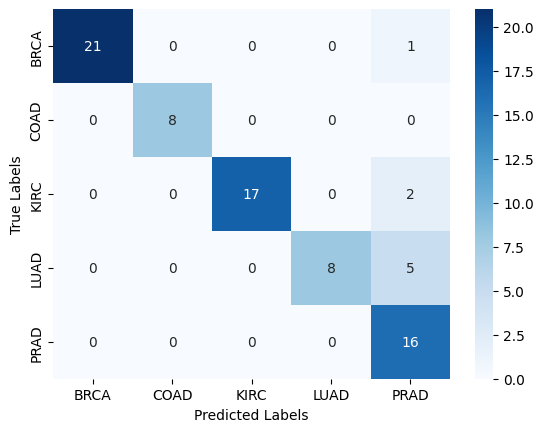

In [ ]:
#visualize the confusion matrix using seaborn

sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

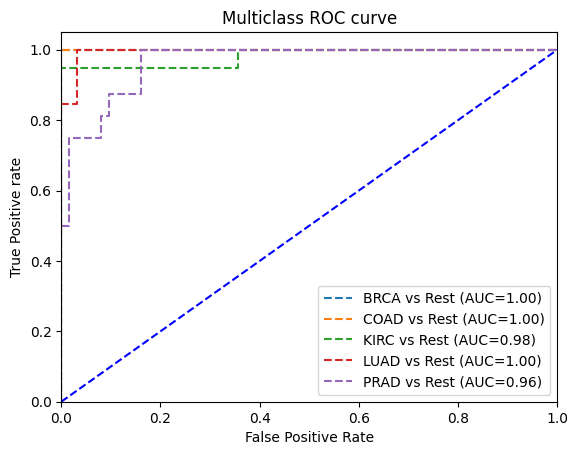

In [ ]:
#roc curves will be generated for each class
#we will therefore have to binarize the y_test labels
#this is done because the probabilities(pred_prob) are calculated for each each class
#we therefore need to put the y_test label in the same format as the pred_prob
y_test_binarized=label_binarize(y_test,classes=classes)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#svm classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)

SVC()

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(292, 42) (292,) (98, 42) (98,)


In [ ]:
classifier.score(X_train,y_train)

0.9554794520547946

In [ ]:
classifier.score(X_test,y_test)

0.8979591836734694

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9114
precision:0.9115
recall:0.8980
f1score:0.8988


classification report


              precision    recall  f1-score   support

        BRCA       0.96      0.96      0.96        24
        COAD       1.00      0.94      0.97        16
        KIRC       1.00      1.00      1.00        16
        LUAD       0.90      0.72      0.80        25
        PRAD       0.70      0.94      0.80        17

    accuracy                           0.90        98
   macro avg       0.91      0.91      0.91        98
weighted avg       0.91      0.90      0.90        98



In [ ]:
#generate confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)

In [ ]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,23,0,0,0,1
COAD,0,15,0,1,0
KIRC,0,0,16,0,0
LUAD,1,0,0,18,6
PRAD,0,0,0,1,16


Text(50.722222222222214, 0.5, 'True Labels')

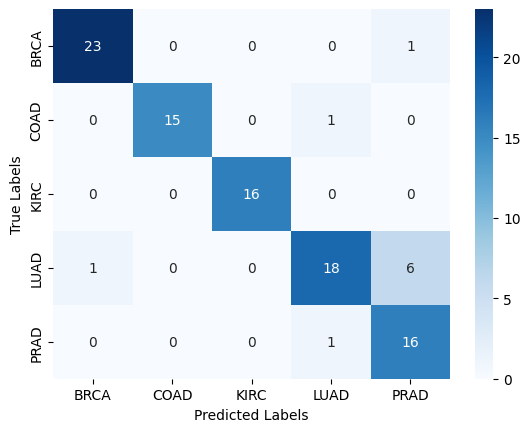

In [ ]:
sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [ ]:
#knn classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe=pd.read_csv('/content/DNA_Dataset_Normalized.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.3, random_state = 0)


In [ ]:
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

In [ ]:
classifier= KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=classifier.predict(X_test)
y_pred

array(['BRCA', 'KIRC', 'PRAD', 'COAD', 'LUAD', 'COAD', 'LUAD', 'LUAD',
       'KIRC', 'COAD', 'KIRC', 'BRCA', 'KIRC', 'PRAD', 'LUAD', 'BRCA',
       'BRCA', 'PRAD', 'LUAD', 'BRCA', 'PRAD', 'LUAD', 'PRAD', 'BRCA',
       'PRAD', 'COAD', 'PRAD', 'COAD', 'COAD', 'COAD', 'PRAD', 'PRAD',
       'PRAD', 'PRAD', 'BRCA', 'BRCA', 'PRAD', 'PRAD', 'KIRC', 'KIRC',
       'KIRC', 'BRCA', 'LUAD', 'BRCA', 'BRCA', 'BRCA', 'BRCA', 'KIRC',
       'LUAD', 'COAD', 'PRAD', 'BRCA', 'COAD', 'PRAD', 'BRCA', 'BRCA',
       'KIRC', 'BRCA', 'LUAD', 'PRAD', 'KIRC', 'COAD', 'LUAD', 'PRAD',
       'BRCA', 'BRCA', 'LUAD', 'KIRC', 'KIRC', 'KIRC', 'COAD', 'BRCA',
       'BRCA', 'KIRC', 'COAD', 'KIRC', 'LUAD', 'KIRC', 'LUAD', 'BRCA',
       'BRCA', 'LUAD', 'KIRC', 'PRAD', 'PRAD', 'LUAD', 'COAD', 'BRCA',
       'LUAD', 'PRAD', 'LUAD', 'KIRC', 'PRAD', 'BRCA', 'PRAD', 'KIRC',
       'COAD', 'BRCA', 'PRAD', 'COAD', 'COAD', 'BRCA', 'COAD', 'PRAD',
       'KIRC', 'PRAD', 'LUAD', 'COAD', 'KIRC', 'PRAD', 'BRCA', 'COAD',
      

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[26  0  0  0  0]
 [ 0 21  1  0  1]
 [ 0  0 20  0  0]
 [ 1  0  2 19  6]
 [ 1  0  0  0 19]]


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)

In [ ]:
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,26,0,0,0,0
COAD,0,21,1,0,1
KIRC,0,0,20,0,0
LUAD,1,0,2,19,6
PRAD,1,0,0,0,19


Text(50.722222222222214, 0.5, 'True Labels')

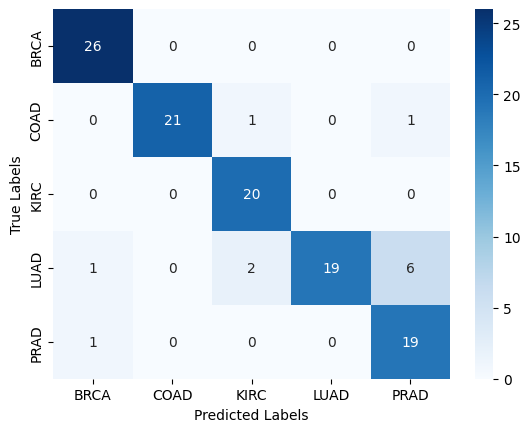

In [ ]:
sns.heatmap(cm_df,annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [ ]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('precision:%0.4f'%precision)

#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)


report=classification_report(y_test,y_pred, target_names=labels)
print('\n')
print('classification report\n\n')
print(report)

accuracy:0.9083
precision:0.9158
recall:0.8974
f1score:0.8954


classification report


              precision    recall  f1-score   support

        BRCA       0.93      1.00      0.96        26
        COAD       1.00      0.91      0.95        23
        KIRC       0.87      1.00      0.93        20
        LUAD       1.00      0.68      0.81        28
        PRAD       0.73      0.95      0.83        20

    accuracy                           0.90       117
   macro avg       0.91      0.91      0.90       117
weighted avg       0.92      0.90      0.90       117



In [ ]:
print(accuracy_score(y_test,y_pred))

0.8974358974358975


In [ ]:
K = []
training = []
test = []
scores = {}

for k in range(1,6):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

0.8974358974358975


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


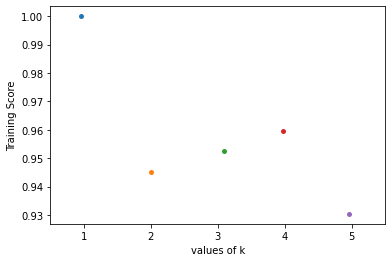

In [ ]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')

plt.show()

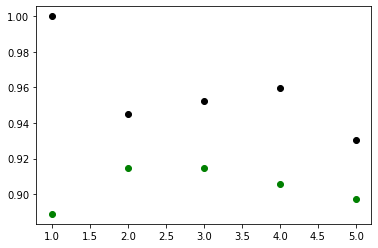

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

In [ ]:
import joblib

In [ ]:
cd drive/MyDrive

In [ ]:
joblib.dump(RF,"./model.joblib")

In [ ]:
rf=joblib.load("./model.joblib")